In [28]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [29]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


In [30]:
def cut_off_at_100(x):
    return min(x, 100)

apply Function to Table

In [31]:
ages.apply(cut_off_at_100, "Age")

array([ 17, 100,  52, 100,   6, 100])

In [32]:
ages.with_columns("Cut off ages", ages.apply(cut_off_at_100, "Age"))

Person,Age,Cut off ages
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


## Application

In [33]:
familiy_heights = Table.read_table('../assets/family_heights.csv').drop(3)
familiy_heights

family,father,mother,children,childNum,sex,childHeight
1,78.5,67,4,1,male,73.2
1,78.5,67,4,2,female,69.2
1,78.5,67,4,3,female,69
1,78.5,67,4,4,female,69
2,75.5,66.5,4,1,male,73.5
2,75.5,66.5,4,2,male,72.5
2,75.5,66.5,4,3,female,65.5
2,75.5,66.5,4,4,female,65.5
3,75,64,2,1,male,71
3,75,64,2,2,female,68


In [34]:
parent_average = (familiy_heights.column(1) + familiy_heights.column(2)) / 2.0
heights = Table().with_columns("Parent average", parent_average,
                              "childHeight", familiy_heights.column(6))
heights

Parent average,childHeight
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


如何绘制更加复杂的重叠样式的图表

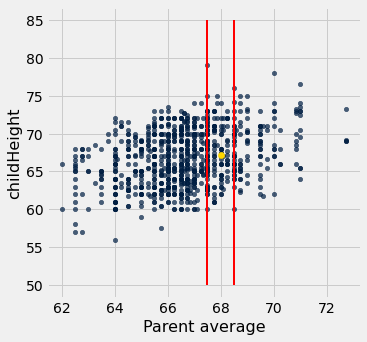

In [35]:
# 把所有绘图指令都放在一个cell中
heights.scatter("Parent average")
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 67.2, color='gold', s=40);

In [36]:
close_68 = heights.where("Parent average", are.between(67.5, 68.5))
close_68

Parent average,childHeight
68,74
68,70
68,68
68,67
68,67
68,66
68,63.5
68,63
67.5,65
68.1,62.7


In [37]:
np.average(close_68.column("childHeight"))

67.620000000000005

In [45]:
def predict_child(p_avg):
    close_points = heights.where("Parent average", are.between(p_avg - 0.5, p_avg + 0.5))
    return np.round(np.average(close_points.column("child")), 1)

In [39]:
heights.relabel("childHeight", "child")
heights

Parent average,child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


In [46]:
heights.apply(predict_child, "Parent average")

array([ 70.1,  70.1,  70.1,  70.1,  70.4,  70.4,  70.4,  70.4,  68.5,
        68.5,  68.5,  68.5,  68.5,  68.5,  68.5,  66.5,  66.5,  66.5,
        66.5,  66.5,  66.5,  70.4,  70.4,  70.4,  70.4,  70.4,  70.4,
        70.4,  69.3,  69.3,  69.3,  69.3,  68.7,  67.6,  67.6,  67.6,
        67.6,  67.6,  67.6,  67.6,  67.6,  67.5,  68.6,  68.6,  68.6,
        68.6,  68.7,  68.7,  68.7,  68. ,  68. ,  68. ,  68. ,  68. ,
        68. ,  68. ,  68. ,  68. ,  68.1,  68.1,  68.1,  68.1,  68.1,
        68.1,  67.5,  67.5,  67.5,  67.7,  70.4,  70.4,  70.4,  70.4,
        70.4,  70.4,  70.4,  70.4,  68.6,  68.6,  68.6,  68.5,  68.5,
        68.5,  67.5,  67.5,  67.5,  67.5,  67.5,  67.5,  67.5,  68.1,
        67.6,  67.6,  67.5,  67.5,  67.5,  67.5,  67.5,  67.5,  67.5,
        67.5,  67.5,  67.5,  67.5,  67.5,  67.5,  67.5,  67.6,  67.6,
        67.6,  66.8,  67.1,  67.1,  67.1,  67.1,  67.1,  67.1,  66.8,
        66.8,  66.8,  66.8,  66.8,  66.8,  66.8,  66.8,  66.8,  66.8,
        66.2,  68.6,

In [48]:
heights_with_prediction = heights.with_columns("Prediction", heights.apply(predict_child, "Parent average"))
heights_with_prediction

Parent average,child,Prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4
71,72.5,70.4
71,65.5,70.4
71,65.5,70.4
69.5,71,68.5
69.5,68,68.5


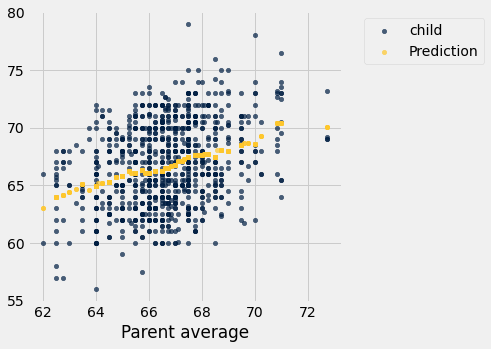

In [49]:
heights_with_prediction.scatter('Parent average')

In [51]:
predict_child(68)

67.599999999999994

In [58]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25)
)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.25


In [59]:
cones.group("Flavor")

Flavor,count
chocolate,3
strawberry,2


In [60]:
cones.group("Flavor", sum)

Flavor,Price sum
chocolate,16.55
strawberry,8.8


In [61]:
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.25


In [69]:
cones_choc = cones.where("Flavor", are.equal_to("chocolate")).column("Price")
cones_strawb = cones.where("Flavor", are.equal_to('strawberry')).column("Price")

group_cones = Table().with_columns("Flavor", make_array("chocolate", "strawberry"),
                                  "Array of All the Prices", make_array(cones_choc, cones_strawb))
price_total = group_cones.with_columns("Sum of the Array", make_array(sum(cones_choc), sum(cones_strawb)))
price_total

Flavor,Array of All the Prices,Sum of the Array
chocolate,[ 4.75 6.55 5.25],16.55
strawberry,[ 3.55 5.25],8.8


Another example

In [72]:
nba1 = Table.read_table("../assets/nba_salaries.csv")
nba1.relabel("'15-'16 SALARY", "SALARY")

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


### Q1. how much oney did each team pay for its players' salaries?

In [75]:
nba1.select("TEAM", "SALARY").group("TEAM",sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


### how many NBA players were there in each of the five positions?

In [76]:
nba1.group("POSITION")

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


### What was the average salary of the player at each of the five positions?

In [85]:
nba_position = nba1.group("POSITION", np.mean)
# nba_position.with_columns("avereage salary", )
nba_position.select("POSITION", "SALARY mean")

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


In [86]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [87]:
more_cones.group("Flavor")

Flavor,count
bubblegum,1
chocolate,3
strawberry,2
